<a href="https://colab.research.google.com/github/mizuirorivi/AI_lab/blob/main/observe_kernel_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%pip install -U scikit-learn
%pip install -U matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Linear SVM Accuracy: 0.8333333333333334
Polynomial SVM Accuracy: 0.9333333333333333
RBF SVM Accuracy(gamma = 0.1): 0.7666666666666667


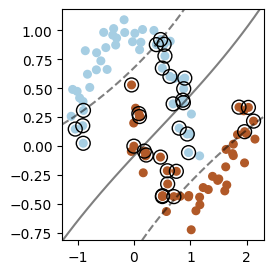

RBF SVM Accuracy(gamma = 1): 0.9666666666666667


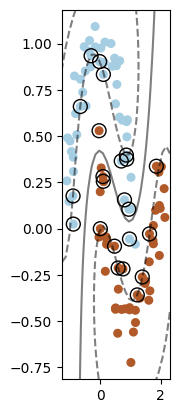

RBF SVM Accuracy(gamma = 10): 1.0


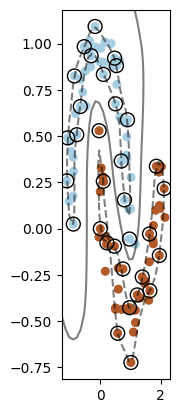

RBF SVM Accuracy(gamma = 100): 1.0


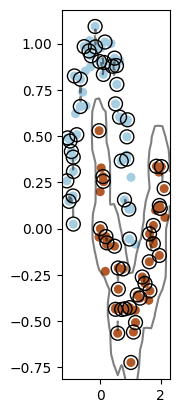

In [21]:
from sklearn.datasets import make_classification, make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# 線形分離可能なデータセットの生成
X, y = make_classification(n_features=100,n_redundant=5,n_informative=2,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 線形SVMモデルの訓練と評価
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
predictions = model_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, predictions))

# 非線形データセットの生成
X, y = make_moons(noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 多項式カーネルSVMの訓練と評価
model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X_train, y_train)
predictions = model_poly.predict(X_test)
print("Polynomial SVM Accuracy:", accuracy_score(y_test, predictions))

gamma = [0.1,1,10,100]
plt.figure(figsize=(12,3))

for i,gamma in enumerate(gamma,1): 
    # RBFカーネルSVMの訓練と評価
    model_rbf = SVC(kernel='rbf',gamma=gamma)
    model_rbf.fit(X_train, y_train)
    predictions = model_rbf.predict(X_test)
    
    print(format("RBF SVM Accuracy(gamma = {}): {}".format(gamma, accuracy_score(y_test, predictions))))
    
    plt.subplot(1,4,i)
    plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # グリッドの作成
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model_rbf.decision_function(xy).reshape(XX.shape)
    # マージンのプロット
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # サポートベクタのプロット
    ax.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()